## Arbol de Decision

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [8]:
dataset=pd.read_csv('../python-ml-course/datasets/iris/iris.csv')
dataset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
predictors=dataset.columns.values.tolist()[:4]
target=dataset.columns.values.tolist()[4]

In [27]:
#Se crean conjuntos de entrenamiento
dataset['is_train']=np.random.uniform(0,1,len(dataset))<=.75 
train,test=dataset[dataset['is_train']==True],dataset[dataset['is_train']==False]

In [30]:
#Se crea modelo con el metodo de entropia y un minimo de 20 muestras por nodo, con la semilla 99 para el propio metodo
model=DecisionTreeClassifier(criterion='entropy',min_samples_split=20,random_state=99) 

model.fit(train[predictors],train[target])#se entrena

predicciones=model.predict(test[predictors])#se realizan predicicones

pd.crosstab(test[target],predicciones,rownames=['Valor Real'],colnames=['Valor Predicho'])

Valor Predicho,setosa,versicolor,virginica
Valor Real,,,
setosa,13,0,0
versicolor,0,15,1
virginica,0,0,10


### Visualizacion de Arbol

In [31]:
from sklearn.tree import export_graphviz

In [32]:
with open('iris-dtree.dot','w') as dotfile: #creamos un archivo llamado iris-dtree.dot
    export_graphviz(model,out_file=dotfile,feature_names=predictors) #seteamos los parametros(modelo,archivo,predictores)
    dotfile.close()

In [34]:
import os
from graphviz import Source

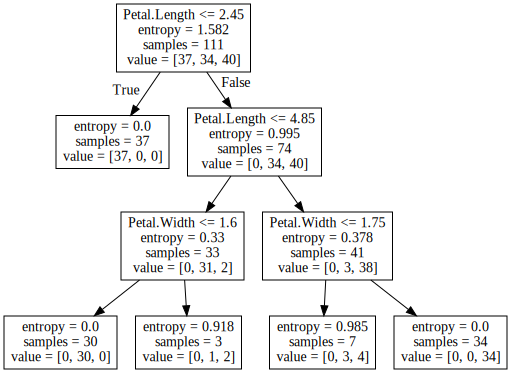

In [35]:
file=open('iris-dtree.dot','r')
text=file.read()
Source(text)

### Validacion Cruzada

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X=dataset[predictors]
Y=dataset[target]

In [46]:
for i in range(1,11):
    cross_validation=KFold(X.shape[0],n_splits=i,shuffle=True,random_state=1)
    scores=cross_val_score(model,X,Y,scoring='accuary',cv=cross_validation)
    score=np.mean(scores)
    print(score)

TypeError: __init__() got multiple values for argument 'n_splits'